In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
print(tf.__version__)

1.12.0


In [3]:
QBtrain = pd.read_csv('TrainingBig/QBtrain.csv')
QBtrain.columns

Index(['Unnamed: 0', 'Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'Third

In [4]:
QBtrain = QBtrain.drop('Unnamed: 0', axis=1)

In [5]:
QBtrain.describe()

,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,...,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000,1926.000000
mean,19.391546,30.360600,59.970106,221.651282,6.925337,1.379769,0.708172,85.559476,2.787295,11.563102,...,55.876895,6.228712,14.949896,114.732087,63.316978,239.347839,6.809086,10.748339,1.592874,88.612150
std,7.558592,11.208688,16.432031,88.556892,2.213155,0.800107,0.520376,26.219244,1.952944,12.218943,...,8.943406,1.328697,2.277122,140.097858,3.461191,24.354289,0.605889,0.752758,0.369068,9.238802
min,0.000000,0.000000,0.000000,-0.666667,-0.700000,0.000000,0.000000,0.000000,0.000000,-8.000000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,17.500000,28.800000,59.528750,191.892857,6.502273,1.000000,0.333333,78.918750,1.428571,2.114583,...,50.000000,5.400000,13.300000,34.187500,60.600000,225.000000,6.400000,10.200000,1.312500,82.000000
50%,21.400000,33.250000,63.740000,244.366667,7.290000,1.400000,0.666667,90.736667,2.333333,7.666667,...,55.600000,6.200000,14.500000,35.812500,63.350000,238.132053,6.800000,10.700000,1.562500,89.000000
75%,24.081731,37.000000,67.240476,275.412338,7.932143,2.000000,1.000000,99.876500,3.750000,17.500000,...,60.000000,7.100000,16.575000,252.000000,64.900000,252.375000,7.200000,11.200000,1.875000,94.000000
max,39.000000,53.000000,100.000000,439.000000,22.000000,5.000000,4.000000,158.330000,14.000000,104.000000,...,88.900000,10.100000,22.300000,535.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [6]:
QBtrain.head()

,Name,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
0,Joe Flacco,25.666667,41.166667,61.633333,267.500000,6.300000,1.333333,1.166667,77.760000,1.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
1,Jay Cutler,18.000000,36.000000,50.000000,225.000000,6.200000,1.000000,1.000000,67.480000,4.000000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
2,Andy Dalton,21.777778,32.888889,66.600000,269.222222,8.488889,2.000000,0.555556,107.934444,4.777778,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
3,Josh McCown,24.500000,36.666667,66.783333,281.000000,7.450000,1.333333,0.500000,93.173333,2.166667,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79
4,Matthew Stafford,26.500000,40.750000,65.300000,254.250000,6.425000,1.250000,1.250000,80.237500,1.500000,...,55.3,5.9,17.1,35.8125,59.9,230.4375,6.4,10.7,1.5,79


In [7]:
QBtrain.columns

Index(['Name', 'CompletionsGame', 'AttemptsGame',
       'PassingCompletionPercentage', 'YardsGame', 'PassingYardsPerAttempt',
       'PassingTouchdownsGame', 'InterceptionsGame', 'PassingRating',
       'RushingAttemptsGame', 'RushingYardsGame', 'RushingYardsPerAttempt',
       'RushingTouchdownsGame', 'PointsGame', 'Score', 'RZCompletionsGame',
       'RZAttemptsGame', 'RZPassingCompletionPercentage', 'RZYardsGame',
       'RZPassingYardsPerAttempt', 'RZPassingTouchdownsGame',
       'RZInterceptionsGame', 'RZPassingRating', 'RZRushingAttemptsGame',
       'RZRushingYardsGame', 'RZRushingYardsPerAttempt',
       'RZRushingTouchdownsGame', 'RZPointsGame', 'SnapsPlayedPercentage',
       'RushSnapPercentage', 'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts',

In [8]:
df = QBtrain.drop(['Name', 'Home'], axis=1).astype('float64')

In [9]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df)
y_noano = clf.predict(df)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = df.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 193
Number of rows without outliers: 1733


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CompletionsGame,1541.0,19.317422,7.655962,0.000000,17.500000,21.500000,24.000000,39.000000
AttemptsGame,1541.0,30.182290,11.335827,0.000000,28.750000,33.250000,37.000000,53.000000
PassingCompletionPercentage,1541.0,59.975216,16.903545,0.000000,59.600000,63.800000,67.430769,100.000000
YardsGame,1541.0,220.515342,89.633477,0.000000,190.000000,244.333333,275.600000,439.000000
PassingYardsPerAttempt,1541.0,6.919797,2.264617,0.000000,6.500000,7.300000,7.950000,22.000000
PassingTouchdownsGame,1541.0,1.377816,0.809254,0.000000,1.000000,1.400000,2.000000,4.333333
InterceptionsGame,1541.0,0.703847,0.522121,0.000000,0.333333,0.666667,1.000000,4.000000
PassingRating,1541.0,85.604310,26.749882,0.000000,78.690000,90.974286,100.054615,158.330000
RushingAttemptsGame,1541.0,2.740852,1.929460,0.000000,1.400000,2.333333,3.750000,14.000000
RushingYardsGame,1541.0,11.334738,12.285490,-7.000000,2.000000,7.333333,17.000000,104.000000


In [12]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
df_labels = df.pop('Score')

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_df = norm(df)

In [14]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [15]:
model = build_model()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 2,641
Trainable params: 2,641
Non-trainable params: 0
_________________________________________________________________


In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.02902198],
       [ 0.5246076 ],
       [ 0.01202962],
       [-0.38627255],
       [-0.9922497 ],
       [-0.77749777],
       [-1.1721479 ],
       [ 0.74955237],
       [-0.26339757],
       [-0.21448463]], dtype=float32)

In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,86.078822,7.323847,86.078822,18.228966,3.305739,18.228966,495
496,86.853546,7.355517,86.853546,18.174564,3.303624,18.174564,496
497,87.448824,7.393464,87.448824,17.978450,3.312660,17.978450,497
498,89.682499,7.420821,89.682499,18.076446,3.291932,18.076446,498
499,86.741972,7.329929,86.741972,18.077486,3.304718,18.077486,499


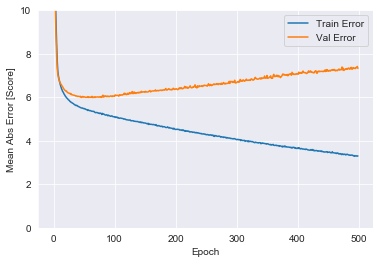

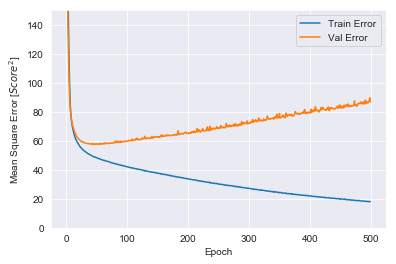

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Score]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,10])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Score^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,150])

plot_history(history)

In [21]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  6.96 Score



.................................................................

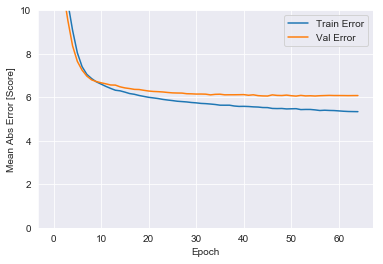

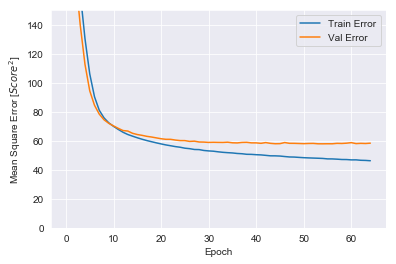

In [22]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} Score".format(mae))

Testing set Mean Abs Error:  6.00 Score


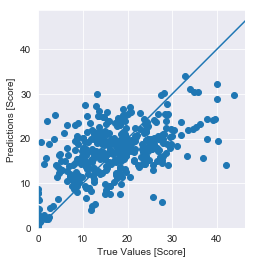

In [24]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Score]')
plt.ylabel('Predictions [Score]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

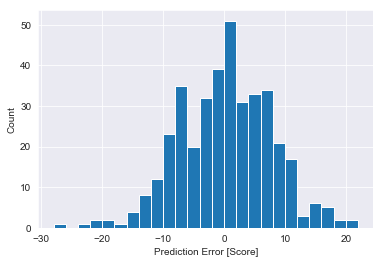

In [25]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Score]")
_ = plt.ylabel("Count")

In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(40, activation=tf.nn.leaky_relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


................................................................................

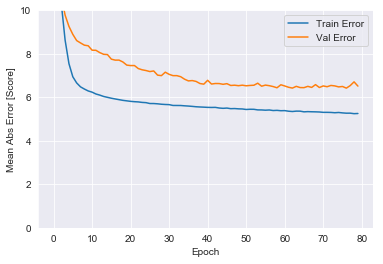

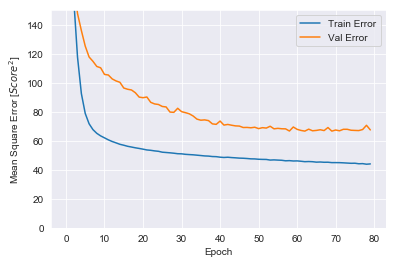

In [27]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_df, df_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [28]:
Offense = pd.read_csv('Input/Offense/Offense.csv')
Offense = Offense.set_index('Team')
Offense.head()


,PointsPerGame,Score,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,...,OpponentTacklesForLossPercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
SF,21.5,301,891,5099,5.7,307,168,37.5,43,41.9,...,26.2,8.7,22.2,461,62.0,3371,7.3,11.8,23,86
CHI,27.4,383,890,4845,5.4,294,175,39.4,48,64.6,...,19.1,6.2,11.9,457,65.9,3166,6.9,10.5,27,93
CIN,24.1,337,846,4567,5.4,280,167,38.9,42,71.4,...,24.0,5.7,11.3,499,61.3,3112,6.2,10.2,25,85
BUF,15.4,215,889,4108,4.6,246,192,31.8,32,56.2,...,21.8,8.5,19.7,432,54.2,2362,5.5,10.1,9,58
DEN,21.9,306,879,4932,5.6,282,179,33.0,40,57.5,...,19.2,6.0,16.8,503,62.2,3207,6.4,10.2,16,81


In [29]:
Offense['Played'] = Offense['Score'] / Offense['PointsPerGame']

In [30]:
Offense['OffensivePlays'] = Offense['OffensivePlays'] / Offense['Played']
Offense['OffensiveYards'] = Offense['OffensiveYards'] / Offense['Played']
Offense['FirstDowns'] = Offense['FirstDowns'] / Offense['Played']
Offense['ThirdDownAttempts'] = Offense['ThirdDownAttempts'] / Offense['Played']
Offense['RedZoneAttempts'] = Offense['RedZoneAttempts'] / Offense['Played']
Offense['PassingAttempts'] = Offense['PassingAttempts'] / Offense['Played']
Offense['PassingYards'] = Offense['PassingYards'] / Offense['Played']
Offense['PassingTouchdowns'] = Offense['PassingTouchdowns'] / Offense['Played']

In [31]:
QBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'TimesSackedPercentage', 'OpponentQuarterbackHitsPercentage']]

In [32]:
RBOffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'OpponentTacklesForLossPercentage']]

In [33]:
WROffense = Offense[['PointsPerGame', 'OffensivePlays', 'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns', \
                    'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts', 'RedZonePercentage', \
                    'PassingAttempts', 'CompletionPercentage', 'PassingYards', 'TeamPassingYardsPerAttempt', \
                    'PassingYardsPerCompletion', 'PassingTouchdowns', 'PasserRating']]

In [34]:
Def = pd.read_csv('Input/Defense/Def.csv')
Def['Opponent'] = Def['Team']
Def = Def.drop('Team', axis=1)
Def = Def.set_index('Opponent')
Def.head()

,OpponentPointsPerGame,OpponentScore,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating,OpponentRushingTouchdowns
Opponent,,,,,,,,,,,,,,,,,,,,,
SF,26.6,373,892,4844,5.4,289,189,38.1,50,64.0,...,6.6,16.6,484,62.4,3275,6.8,10.8,30,101,11
CHI,18.9,264,898,4352,4.8,251,194,34.5,36,52.8,...,7.6,15.1,544,61.6,3182,5.8,9.5,21,71,5
CIN,29.5,413,952,5782,6.1,331,196,50.5,52,67.3,...,6.2,14.2,501,65.9,3789,7.6,11.5,28,98,17
BUF,23.8,333,834,4091,4.9,256,179,38.0,44,72.7,...,6.7,17.0,435,64.6,2624,6.0,9.3,20,85,15
DEN,21.4,299,910,5293,5.8,285,187,39.0,39,56.4,...,7.8,16.6,499,64.1,3610,7.2,11.3,25,90,8


In [35]:
Def['Played'] = Def['OpponentScore'] / Def['OpponentPointsPerGame']

In [36]:
Def['OpponentOffensivePlays'] = Def['OpponentOffensivePlays'] / Def['Played']
Def['OpponentOffensiveYards'] = Def['OpponentOffensiveYards'] / Def['Played']
Def['OpponentFirstDowns'] = Def['OpponentFirstDowns'] / Def['Played']
Def['OpponentThirdDownAttempts'] = Def['OpponentThirdDownAttempts'] / Def['Played']
Def['OpponentRedZoneAttempts'] = Def['OpponentRedZoneAttempts'] / Def['Played']
Def['OpponentRushingYards'] = Def['OpponentRushingYards'] / Def['Played']
Def['OpponentPassingYards'] = Def['OpponentPassingYards'] / Def['Played']
Def['OpponentPassingTouchdowns'] = Def['OpponentPassingTouchdowns'] / Def['Played']
Def['OpponentRushingTouchdowns'] = Def['OpponentRushingTouchdowns'] / Def['Played']

In [37]:
QBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentTimesSackedPercentage', 'QuarterbackHitsPercentage', 'OpponentPassingAttempts', \
            'OpponentCompletionPercentage', 'OpponentPassingYards', 'OpponentPassingYardsPerAttempt', \
            'OpponentPassingYardsPerCompletion', 'OpponentPassingTouchdowns', 'OpponentPasserRating']]

In [38]:
RBDefense = Def[['OpponentPointsPerGame', 'OpponentOffensivePlays', 'OpponentOffensiveYards', \
             'OpponentOffensiveYardsPerPlay', 'OpponentFirstDowns', 'OpponentThirdDownAttempts', \
            'OpponentThirdDownPercentage', 'OpponentRedZoneAttempts', 'OpponentRedZonePercentage', \
            'OpponentRushingYards', 'OpponentRushingYardsPerAttempt', 'TacklesForLossPercentage', 'OpponentRushingTouchdowns']]

In [39]:
QB = pd.read_csv('Input/Aggregate/QBAggregate.csv')
QBavg = pd.DataFrame()

QBavg['Name'] = QB['Name']
QBavg['Team'] = QB['Team']
QBavg['Rank'] = QB['Rank']
QBavg['CompletionsGame'] = QB['PassingCompletions'] / QB['Played']
QBavg['AttemptsGame'] = QB['PassingAttempts'] / QB['Played']
QBavg['PassingCompletionPercentage'] = QB['PassingCompletionPercentage']
QBavg['YardsGame'] = QB['PassingYards'] / QB['Played']
QBavg['PassingYardsPerAttempt'] = QB['PassingYardsPerAttempt']
QBavg['PassingTouchdownsGame'] = QB['PassingTouchdowns'] / QB['Played']
QBavg['InterceptionsGame'] = QB['PassingInterceptions'] / QB['Played']
QBavg['PassingRating'] = QB['PassingRating']
QBavg['RushingAttemptsGame'] = QB['RushingAttempts'] / QB['Played']
QBavg['RushingYardsGame'] = QB['RushingYards'] / QB['Played']
QBavg['RushingYardsPerAttempt'] = QB['RushingYardsPerAttempt']
QBavg['RushingTouchdownsGame'] = QB['RushingTouchdowns'] / QB['Played']
QBavg['PointsGame'] = QB['FantasyPointsPerGameDraftKings']

QBavg = QBavg.set_index('Name')
QBavg.head()

,Team,Rank,CompletionsGame,AttemptsGame,PassingCompletionPercentage,YardsGame,PassingYardsPerAttempt,PassingTouchdownsGame,InterceptionsGame,PassingRating,RushingAttemptsGame,RushingYardsGame,RushingYardsPerAttempt,RushingTouchdownsGame,PointsGame
Name,,,,,,,,,,,,,,,
Patrick Mahomes,KC,1,24.714286,36.857143,67.1,324.500000,8.8,3.214286,0.785714,114.83,3.928571,17.000000,4.3,0.142857,29.6
Matt Ryan,ATL,2,26.857143,38.428571,69.9,307.642857,8.0,2.142857,0.428571,107.62,2.000000,8.500000,4.2,0.214286,24.1
Ben Roethlisberger,PIT,3,27.714286,41.428571,66.9,318.714286,7.7,2.142857,1.071429,96.35,1.857143,6.500000,3.5,0.214286,24.0
Andrew Luck,IND,4,26.785714,39.785714,67.3,282.214286,7.1,2.428571,0.928571,98.37,2.642857,8.428571,3.2,0.000000,22.5
Jared Goff,LAR,5,23.571429,36.500000,64.6,305.214286,8.4,1.928571,0.857143,98.57,2.857143,7.285714,2.6,0.071429,22.1


In [40]:
QBRZ = pd.read_csv('Input/RZ/QBRZ.csv')

QBRZavg = pd.DataFrame()

QBRZavg['Name'] = QBRZ['Name']
QBRZavg['RZCompletionsGame'] = QBRZ['PassingCompletions'] / QBRZ['Played']
QBRZavg['RZAttemptsGame'] = QBRZ['PassingAttempts'] / QBRZ['Played']
QBRZavg['RZPassingCompletionPercentage'] = QBRZ['PassingCompletionPercentage']
QBRZavg['RZYardsGame'] = QBRZ['PassingYards'] / QBRZ['Played']
QBRZavg['RZPassingYardsPerAttempt'] = QBRZ['PassingYardsPerAttempt']
QBRZavg['RZPassingTouchdownsGame'] = QBRZ['PassingTouchdowns'] / QBRZ['Played']
QBRZavg['RZInterceptionsGame'] = QBRZ['PassingInterceptions'] / QBRZ['Played']
QBRZavg['RZPassingRating'] = QBRZ['PassingRating']
QBRZavg['RZRushingAttemptsGame'] = QBRZ['RushingAttempts'] / QBRZ['Played']
QBRZavg['RZRushingYardsGame'] = QBRZ['RushingYards'] / QBRZ['Played']
QBRZavg['RZRushingYardsPerAttempt'] = QBRZ['RushingYardsPerAttempt']
QBRZavg['RZRushingTouchdownsGame'] = QBRZ['RushingTouchdowns'] / QBRZ['Played']
QBRZavg['RZPointsGame'] = QBRZ['FantasyPointsPerGameDraftKings']

QBRZ = QBRZavg.set_index('Name')
QBRZ.head()

,RZCompletionsGame,RZAttemptsGame,RZPassingCompletionPercentage,RZYardsGame,RZPassingYardsPerAttempt,RZPassingTouchdownsGame,RZInterceptionsGame,RZPassingRating,RZRushingAttemptsGame,RZRushingYardsGame,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame
Name,,,,,,,,,,,,,
Patrick Mahomes,4.285714,6.571429,65.2,32.071429,4.9,2.357143,0.071429,111.82,0.928571,3.071429,3.3,0.142857,11.8
Andrew Luck,3.785714,6.000000,63.1,29.000000,4.8,2.000000,0.071429,109.42,0.214286,1.000000,4.7,0.000000,9.5
Drew Brees,4.357143,6.214286,70.1,25.785714,4.1,1.500000,0.000000,117.39,0.428571,0.928571,2.2,0.285714,9.0
Cam Newton,2.785714,4.071429,68.4,19.214286,4.7,1.357143,0.142857,103.73,1.142857,3.857143,3.4,0.285714,8.4
Matt Ryan,3.071429,4.785714,64.2,24.285714,5.1,1.428571,0.071429,110.07,0.357143,-0.428571,-1.2,0.214286,8.1


In [41]:
QBsnaps = pd.read_csv('Input/Aggregate/QBSnaps.csv')
QBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Mike Glennon,ARI,QB,1,17,17.0,2.5,0.0,0.0,82.4,82.4,8.44,49.6
1,2,Josh Johnson,WAS,QB,2,97,48.5,74.6,16.5,0.0,58.8,58.8,40.24,41.5
2,3,Patrick Mahomes,KC,QB,14,932,66.6,100.0,5.9,0.0,61.3,61.3,414.52,44.5
3,4,Ryan Fitzpatrick,TB,QB,8,428,53.5,43.9,8.4,0.0,65.9,65.9,190.84,44.6
4,5,Matt Ryan,ATL,QB,14,923,65.9,98.7,3.0,0.0,61.3,61.3,337.18,36.5


In [42]:
QBsnaps = QBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
QBsnaps = QBsnaps.set_index('Name')

In [43]:
Defense = pd.read_csv('Input/Defense/Defense.csv')
QBDef = pd.DataFrame()
QBDef['Team'] = Defense['Team']
QBDef['DPointsAllowed'] = Defense['DraftKingsQuarterbackFantasyPointsAllowedAverage']
QBDef = QBDef.set_index('Team')
QBDef.head()

,DPointsAllowed
Team,
BAL,16.08
MIN,16.31
BUF,13.87
JAX,17.19
TEN,16.59


In [44]:
QBSalaries = pd.read_csv('Input/Salaries/QBSalaries.csv').dropna()
QBSalaries = QBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
QBSalaries = QBSalaries.set_index('Opponent')
QBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
SEA,Patrick Mahomes,KC,7000.0,25.96
NO,Ben Roethlisberger,PIT,6700.0,22.50
PIT,Drew Brees,NO,6500.0,20.40
KC,Russell Wilson,SEA,6100.0,20.38
NYG,Andrew Luck,IND,6200.0,20.30


In [45]:
Vegas = pd.read_csv('Input/Vegas/Veg.csv')
Vegas['total'] = (Vegas['OverUnder'] - Vegas['PointSpread']) / 2
Vegas = Vegas.set_index('Team')
Vegas.head()

,Home,PointSpread,OverUnder,total
Team,,,,
TEN,True,-10.5,37.0,23.75
LAC,True,-4.5,43.0,23.75
MIA,True,-4.0,38.5,21.25
NE,True,-13.0,45.0,29.00
ATL,False,-3.5,43.5,23.50


In [46]:
QBSalaries = QBSalaries.join(QBDef).join(QBDefense)
QBSalaries = QBSalaries.set_index('Team').join(Vegas).join(QBOffense)
QBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Josh Rosen,4500.0,11.05,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
ARI,Mike Glennon,4200.0,0.19,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
ATL,Matt Ryan,6100.0,19.51,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
ATL,Matt Schaub,4000.0,0.07,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
BAL,Lamar Jackson,6000.0,18.36,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,...,71.697361,370.293255,5.2,23.469795,14.597067,47.5,3.720821,61.5,5.0,11.2


In [47]:
QBSalaries = QBSalaries.set_index('Name')
QBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,TimesSackedPercentage,OpponentQuarterbackHitsPercentage
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4500.0,11.05,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
Mike Glennon,4200.0,0.19,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,8.9,19.9
Matt Ryan,6100.0,19.51,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
Matt Schaub,4000.0,0.07,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,6.8,17.6
Lamar Jackson,6000.0,18.36,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,71.697361,370.293255,5.2,23.469795,14.597067,47.5,3.720821,61.5,5.0,11.2


In [48]:
QBs = QBSalaries.join(QBavg).join(QBRZ).join(QBsnaps).dropna()
QBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4500.0,11.05,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.000000,2.6,56.0,81.6,2.8,0.0,52.8,52.8,17.2
Mike Glennon,4200.0,0.19,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.000000,4.4,17.0,2.5,0.0,0.0,82.4,82.4,49.6
Matt Ryan,6100.0,19.51,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,-1.2,0.214286,8.1,65.9,98.7,3.0,0.0,61.3,61.3,36.5
Matt Schaub,4000.0,0.07,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,0.0,0.000000,0.0,4.3,1.4,7.7,7.7,69.2,69.2,8.5
Lamar Jackson,6000.0,18.36,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,3.1,0.214286,3.2,32.0,42.6,25.4,0.4,53.1,53.6,27.8


In [49]:
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test

,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,...,RZRushingYardsPerAttempt,RZRushingTouchdownsGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,3.214286,60.0,...,0.0,0.000000,2.6,56.0,81.6,2.8,0.0,52.8,52.8,17.2
Mike Glennon,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,3.214286,60.0,...,0.0,0.000000,4.4,17.0,2.5,0.0,0.0,82.4,82.4,49.6
Matt Ryan,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,3.003488,71.4,...,-1.2,0.214286,8.1,65.9,98.7,3.0,0.0,61.3,61.3,36.5
Matt Schaub,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,3.003488,71.4,...,0.0,0.000000,0.0,4.3,1.4,7.7,7.7,69.2,69.2,8.5
Lamar Jackson,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,3.216443,55.6,...,3.1,0.214286,3.2,32.0,42.6,25.4,0.4,53.1,53.6,27.8
Joe Flacco,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,3.216443,55.6,...,0.0,0.000000,5.0,71.1,60.9,3.0,0.0,62.2,62.2,23.5
Robert Griffin III,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,3.216443,55.6,...,0.0,0.000000,0.0,7.0,3.5,0.0,0.0,28.6,28.6,4.0
Josh Allen,20.69,22.1,63.305806,371.992903,5.9,21.101935,12.261935,40.7,3.065484,62.8,...,5.2,0.600000,5.6,59.6,67.7,12.6,0.2,55.0,55.2,29.0
Matt Barkley,20.69,22.1,63.305806,371.992903,5.9,21.101935,12.261935,40.7,3.065484,62.8,...,0.0,0.000000,9.3,73.0,16.7,4.1,0.0,38.4,38.4,23.4


In [50]:
columns = train.drop('Score', axis=1)
X_test = X_test[columns.columns]

In [51]:
normed_x_test = norm(X_test)

In [52]:
new_predictions = model.predict(normed_x_test).flatten()

In [53]:
new_predictions

array([ 1.42063589e+01,  1.15046158e+01,  1.56456156e+01,  6.28182220e+00,
        9.46611977e+00,  7.84464884e+00,  3.80179214e+00,  1.24418602e+01,
        1.10172665e+00,  7.80922127e+00,  1.57991304e+01,  8.13015556e+00,
        1.70093975e+01,  5.40947962e+00,  1.24964037e+01,  1.57673693e+01,
        2.12445316e+01,  1.72323570e+01,  5.26961851e+00,  1.59113798e+01,
        1.07844477e+01,  2.83188486e+00,  1.84461460e+01,  3.05324316e+00,
        1.75217133e+01,  8.58804226e-01,  3.42040658e-01,  1.71953945e+01,
       -6.33199096e-01,  1.26485014e+01,  1.61301746e+01,  2.29956608e+01,
        1.23236723e+01,  1.94346344e+00,  1.95466385e+01,  3.62815022e-01,
        5.81124067e+00,  5.37135649e+00,  1.94328823e+01,  1.66075974e+01,
        1.79988110e+00,  1.76161003e+01,  3.29960823e+00,  9.46664810e-03,
        1.32856483e+01,  4.51899672e+00,  7.04713440e+00,  6.26763487e+00,
        1.54342260e+01,  5.20074606e+00,  6.12779522e+00,  9.93255806e+00,
        2.24331226e+01,  

In [54]:
QBs['DNN'] = new_predictions

In [55]:
X_train = QBtrain.drop(['Score', 'Name'], axis=1).astype('float64')
y_train = QBtrain.Score
X_test = QBs.drop(['DraftKingsSalary', 'Team', 'Rank', 'FantasyPointsDraftKings'], axis=1).astype('float64')
X_test = X_test.dropna(axis=1)
X_test = X_test[X_train.columns]

In [56]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [57]:
QBNe = neigh.predict(X_test)

In [58]:
QBs['NeProjections'] = QBNe

In [59]:
QBScores = pd.read_csv('Scores/QBScores.csv')
QB = pd.DataFrame({'Name': [], 'Score': []})
QB['Name'] = QBScores['Name']
QB['Score'] = QBScores['FantasyPointsDraftKings']
QB = QB.set_index('Name')
QBs = QBs.join(QB)
QBs = QBs.dropna()
QBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Josh Rosen,4500.0,11.05,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,56.0,81.6,2.8,0.0,52.8,52.8,17.2,14.206359,11.764,8.38
Mike Glennon,4200.0,0.19,19.46,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,17.0,2.5,0.0,0.0,82.4,82.4,49.6,11.504616,6.772,2.52
Matt Ryan,6100.0,19.51,20.92,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,65.9,98.7,3.0,0.0,61.3,61.3,36.5,15.645616,16.332,20.46
Lamar Jackson,6000.0,18.36,16.47,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,32.0,42.6,25.4,0.4,53.1,53.6,27.8,9.466120,10.264,16.06
Josh Allen,5800.0,17.90,20.69,22.1,63.305806,371.992903,5.9,21.101935,12.261935,40.7,...,59.6,67.7,12.6,0.2,55.0,55.2,29.0,12.441860,14.896,13.68
Taylor Heinicke,4000.0,8.15,23.30,27.2,63.609449,377.159055,5.9,23.130709,12.207874,49.1,...,1.8,1.0,22.2,0.0,66.7,66.7,18.2,8.130156,4.024,15.26
Mitch Trubisky,6300.0,19.00,20.67,26.6,63.611796,345.443432,5.4,20.609651,13.478284,38.1,...,66.4,84.6,7.5,0.0,55.1,55.1,33.5,17.009398,14.664,13.14
Jeff Driskel,4600.0,13.27,19.54,24.9,71.766379,401.834483,5.6,24.184483,13.523276,37.6,...,39.4,30.6,6.5,0.0,54.7,54.7,23.8,12.496404,13.068,17.42
Baker Mayfield,6100.0,18.93,23.47,29.5,68.000000,413.000000,6.1,23.642857,14.000000,50.5,...,64.9,80.8,4.2,0.1,56.5,56.6,27.5,15.767369,15.508,24.96


In [60]:
y_test = QBs.Score
y_pred = QBs.DNN
mean_squared_error(y_test, y_pred)

101.91578043370554

In [61]:
y_test = QBs.Score
y_pred = QBs.NeProjections
mean_squared_error(y_test, y_pred)

106.0449584

In [62]:
RBtrain = pd.read_csv('TrainingBig/RBtrain.csv')
RBtrain.columns


Index(['Unnamed: 0', 'Name', 'RushesGame', 'RushYardGame', 'YardAttempt',
       'RushTdGame', 'TargetsGame', 'RecGame', 'RecYardsGame', 'RecTdGame',
       'PointsGame', 'Score', 'RZattemptsGame', 'RZyardsGame', 'RZYardAtt',
       'RZTDGame', 'RZTarGame', 'RZRecGame', 'RZRecYarGame', 'RZRecTDGame',
       'RZPointsGame', 'SnapsPlayedPercentage', 'RushSnapPercentage',
       'TargetSnapPercentage', 'TouchSnapPercentage',
       'IntendedTouchSnapPercentage', 'DPointsAllowed', 'Home', 'PointSpread',
       'OverUnder', 'total', 'PointsPerGame', 'OffensivePlays',
       'OffensiveYards', 'OffensiveYardsPerPlay', 'FirstDowns',
       'ThirdDownAttempts', 'ThirdDownPercentage', 'RedZoneAttempts',
       'RedZonePercentage', 'OpponentTacklesForLossPercentage',
       'OpponentPointsPerGame', 'OpponentOffensivePlays',
       'OpponentOffensiveYards', 'OpponentOffensiveYardsPerPlay',
       'OpponentFirstDowns', 'OpponentThirdDownAttempts',
       'OpponentThirdDownPercentage', 'OpponentRedZ

In [63]:
RBtrain = RBtrain.drop('Unnamed: 0', axis=1)
RBtrain = RBtrain.set_index('Name')

In [64]:
RBtrain.describe()

,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame,Score,...,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,OpponentRedZoneAttempts,OpponentRedZonePercentage,OpponentRushingYards,OpponentRushingYardsPerAttempt,TacklesForLossPercentage,OpponentRushingTouchdowns
count,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,...,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000,6179.000000
mean,5.893005,24.305212,2.718817,0.169626,1.906713,1.427502,11.738678,0.056697,6.531042,6.849892,...,5.474688,20.075898,13.161833,39.181113,3.135264,55.709468,110.196910,4.189060,19.323175,0.795558
std,6.106504,26.935571,2.138111,0.287677,1.964713,1.523231,13.830876,0.135682,6.560401,8.378691,...,0.422352,1.802616,0.856065,4.229684,0.440771,8.662128,16.368941,0.413303,4.335260,0.266855
min,0.000000,-8.000000,-8.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,-0.700000,-1.800000,...,4.400000,16.062500,10.500000,25.200000,1.750000,34.800000,73.267578,3.300000,10.100000,0.221714
25%,0.500000,1.000000,0.741429,0.000000,0.333333,0.200000,1.000000,0.000000,0.900000,0.000000,...,5.200000,18.812500,12.687500,36.900000,2.812500,50.000000,98.750000,3.900000,16.300000,0.625000
50%,3.666667,14.500000,3.000000,0.000000,1.272727,1.000000,6.777778,0.000000,4.733333,3.700000,...,5.500000,20.062500,13.187500,39.000000,3.187500,55.300000,110.500000,4.200000,19.300000,0.750000
75%,10.261364,40.750000,4.100000,0.250000,3.000000,2.200000,18.000000,0.000000,10.300000,10.600000,...,5.700000,20.972368,13.812500,41.100000,3.437500,60.000000,121.068169,4.500000,22.100000,0.937500
max,31.000000,168.000000,28.000000,3.000000,13.000000,10.000000,129.000000,2.000000,49.600000,55.600000,...,6.700000,26.444444,15.062500,56.200000,4.125000,88.900000,165.812500,5.300000,33.000000,1.562500


In [65]:
RB = pd.read_csv('Input/Aggregate/RBAggregate.csv')
RBavg = pd.DataFrame()
RBavg['Name'] = RB['Name']
RBavg['Team'] = RB['Team']
RBavg['Rank'] = RB['Rank']
RBavg['RushesGame'] = RB['RushingAttempts'] / RB['Played']
RBavg['RushYardGame'] = RB['RushingYards'] / RB['Played']
RBavg['YardAttempt'] = RB['RushingYardsPerAttempt']
RBavg['RushTdGame'] = RB['RushingTouchdowns'] / RB['Played']
RBavg['TargetsGame'] = RB['ReceivingTargets'] / RB['Played']
RBavg['RecGame'] = RB['Receptions'] / RB['Played']
RBavg['RecYardsGame'] = RB['ReceivingYards'] / RB['Played']
RBavg['RecTdGame'] = RB['ReceivingTouchdowns'] / RB['Played']
RBavg['PointsGame'] = RB['FantasyPointsPerGameDraftKings']
RBavg = RBavg.set_index('Name')
RBavg.head()

,Team,Rank,RushesGame,RushYardGame,YardAttempt,RushTdGame,TargetsGame,RecGame,RecYardsGame,RecTdGame,PointsGame
Name,,,,,,,,,,,
Todd Gurley,LAR,1,18.285714,89.357143,4.9,1.214286,5.785714,4.214286,41.428571,0.285714,27.9
Christian McCaffrey,CAR,2,13.857143,69.928571,5.0,0.500000,7.857143,6.714286,54.857143,0.428571,26.2
Saquon Barkley,NYG,3,15.928571,82.500000,5.2,0.642857,7.571429,5.857143,46.714286,0.285714,25.8
Alvin Kamara,NO,4,13.357143,61.428571,4.6,0.857143,7.071429,5.500000,44.785714,0.285714,24.0
Ezekiel Elliott,DAL,5,20.428571,96.428571,4.7,0.428571,6.357143,5.142857,38.785714,0.214286,24.0


In [66]:
RB_RZ = pd.read_csv('Input/RZ/RBRZ.csv')
RBRZavg = pd.DataFrame()
RBRZavg['Name'] = RB_RZ['Name']
RBRZavg['RZattemptsGame'] = RB_RZ['RushingAttempts'] / RB_RZ['Played']
RBRZavg['RZyardsGame'] = RB_RZ['RushingYards'] / RB_RZ['Played']
RBRZavg['RZYardAtt'] = RB_RZ['RushingYardsPerAttempt']
RBRZavg['RZTDGame'] = RB_RZ['RushingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZTarGame'] = RB_RZ['ReceivingTargets'] / RB_RZ['Played']
RBRZavg['RZRecGame'] = RB_RZ['Receptions'] / RB_RZ['Played']
RBRZavg['RZRecYarGame'] = RB_RZ['ReceivingYards'] / RB_RZ['Played']
RBRZavg['RZRecTDGame'] = RB_RZ['ReceivingTouchdowns'] / RB_RZ['Played']
RBRZavg['RZPointsGame'] = RB_RZ['FantasyPointsPerGameDraftKings']
RBRZ = RBRZavg.set_index('Name')
RBRZ.head()

,RZattemptsGame,RZyardsGame,RZYardAtt,RZTDGame,RZTarGame,RZRecGame,RZRecYarGame,RZRecTDGame,RZPointsGame
Name,,,,,,,,,
Todd Gurley,4.571429,14.571429,3.2,1.214286,1.357143,0.642857,5.571429,0.214286,11.7
Alvin Kamara,3.571429,12.357143,3.5,0.785714,1.714286,1.428571,8.857143,0.214286,10.0
Christian McCaffrey,2.785714,8.000000,2.9,0.500000,1.000000,0.857143,5.428571,0.357143,7.3
Melvin Gordon,2.000000,11.100000,5.6,0.700000,1.300000,0.800000,3.300000,0.300000,8.6
James Conner,2.750000,7.333333,2.7,0.750000,0.583333,0.500000,3.000000,0.083333,6.9


In [67]:
RBsnaps = pd.read_csv('Input/Aggregate/RBSnaps.csv')
RBsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Brandon Bolden,MIA,RB,14,10,0.7,1.2,40.0,10.0,50.0,50.0,21.20,212.0
1,2,Darrel Williams,KC,RB,3,20,6.7,4.3,10.0,15.0,25.0,25.0,13.00,65.0
2,3,Nick Chubb,CLE,RB,14,334,23.9,34.6,49.1,6.9,53.9,56.0,186.00,55.7
3,4,Derrick Henry,TEN,RB,14,342,24.4,38.8,52.0,4.7,56.4,57.3,180.56,52.8
4,5,Zach Zenner,DET,RB,6,54,9.0,13.6,48.1,9.3,55.6,57.4,29.10,53.9


In [68]:
RBsnaps = RBsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
RBsnaps = RBsnaps.set_index('Name')

In [69]:
RBDef = pd.DataFrame()
RBDef['Team'] = Defense['Team']
RBDef['DPointsAllowed'] = Defense['DraftKingsRunningbackFantasyPointsAllowedAverage']
RBDef = RBDef.set_index('Team')
RBDef.head()

,DPointsAllowed
Team,
BAL,18.89
MIN,23.31
BUF,26.79
JAX,21.36
TEN,18.54


In [70]:
RBSalaries = pd.read_csv('Input/Salaries/RBSalaries.csv').dropna()
RBSalaries = RBSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
RBSalaries = RBSalaries.set_index('Opponent')
RBSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
TB,Ezekiel Elliott,DAL,9000.0,23.34
ATL,Christian McCaffrey,CAR,8800.0,23.19
IND,Saquon Barkley,NYG,7900.0,21.41
ARI,Todd Gurley,LAR,9200.0,21.07
PIT,Alvin Kamara,NO,7400.0,19.21


In [71]:
RBSalaries = RBSalaries.join(RBDef).join(RBDefense)
RBSalaries = RBSalaries.set_index('Team').join(Vegas).join(RBOffense)
RBSalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Team,,,,,,,,,,,,,,,,,,,,,
ARI,David Johnson,6200.0,15.09,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ARI,Chase Edmonds,3800.0,4.57,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ARI,TJ Logan,3000.0,0.89,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ARI,Derrick Coleman,3000.0,0.26,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
ATL,Tevin Coleman,4800.0,13.43,21.31,24.6,60.713372,352.552326,5.8,20.166279,11.656395,...,25.4,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,33.3


In [72]:
RBSalaries = RBSalaries.set_index('Name')
RBSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,PointsPerGame,OffensivePlays,OffensiveYards,OffensiveYardsPerPlay,FirstDowns,ThirdDownAttempts,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,OpponentTacklesForLossPercentage
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6200.0,15.09,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
Chase Edmonds,3800.0,4.57,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
TJ Logan,3000.0,0.89,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
Derrick Coleman,3000.0,0.26,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,13.7,56.013021,242.889583,4.3,15.127083,12.201562,30.4,1.712500,70.8,26.5
Tevin Coleman,4800.0,13.43,21.31,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,25.4,63.214607,378.859551,6.0,22.046629,12.842697,45.6,3.139326,63.6,33.3


In [73]:
RBs = RBSalaries.join(RBavg).join(RBRZ).join(RBsnaps).dropna()
RBs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZRecYarGame,RZRecTDGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6200.0,15.09,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,2.285714,0.071429,4.6,46.9,79.7,35.2,10.2,42.2,45.4,34.4
Chase Edmonds,3800.0,4.57,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.000000,0.000000,1.1,12.1,20.6,29.4,11.2,39.4,40.6,33.1
TJ Logan,3000.0,0.89,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.375000,0.000000,0.2,2.6,4.3,9.5,33.3,42.9,42.9,51.9
Derrick Coleman,3000.0,0.26,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.000000,0.000000,0.0,4.6,7.9,3.1,4.6,6.2,7.7,6.2
Tevin Coleman,4800.0,13.43,21.31,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,3.642857,0.285714,3.4,37.5,56.1,28.4,8.0,34.3,36.4,34.7


In [74]:
RB_train = RBtrain.drop('Home', axis=1)

In [75]:
train_dataset = RB_train.sample(frac=0.8,random_state=0)
test_dataset = RB_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
RushesGame,4943.0,5.852534,6.072530,0.000000,0.500000,3.666667,10.041667,31.000000
RushYardGame,4943.0,24.125485,26.719643,-8.000000,1.000000,14.333333,40.000000,168.000000
YardAttempt,4943.0,2.728433,2.176497,-8.000000,0.741429,3.000000,4.088194,28.000000
RushTdGame,4943.0,0.166899,0.283164,0.000000,0.000000,0.000000,0.250000,3.000000
TargetsGame,4943.0,1.893099,1.965314,0.000000,0.333333,1.250000,2.888889,13.000000
RecGame,4943.0,1.415071,1.526748,0.000000,0.200000,1.000000,2.153846,10.000000
RecYardsGame,4943.0,11.647006,13.870269,-5.000000,1.000000,6.666667,17.750000,129.000000
RecTdGame,4943.0,0.055949,0.134156,0.000000,0.000000,0.000000,0.000000,2.000000
PointsGame,4943.0,6.468176,6.492127,-0.700000,0.908333,4.728571,10.189899,46.100000
RZattemptsGame,4943.0,0.887069,1.102216,0.000000,0.000000,0.454545,1.444444,8.000000


In [76]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
RB_labels = RB_train.pop('Score')

In [77]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_RB = norm(RB_train)

In [78]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [79]:

EPOCHS = 500

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
495,47.614324,4.954437,47.614324,22.875181,3.452160,22.875181,495
496,47.290992,4.908450,47.290992,22.885060,3.452391,22.885060,496
497,46.855733,4.912068,46.855733,22.886822,3.470195,22.886822,497
498,46.613246,4.888104,46.613246,22.874863,3.449943,22.874863,498
499,47.649365,4.918180,47.649365,22.842395,3.447935,22.842395,499


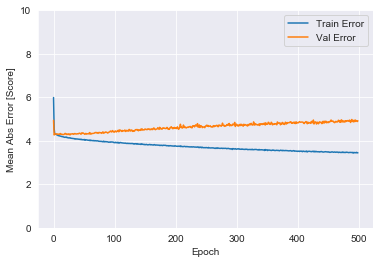

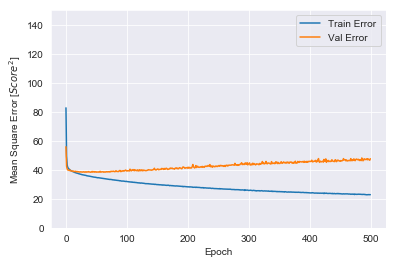

In [81]:
plot_history(history)


........................................

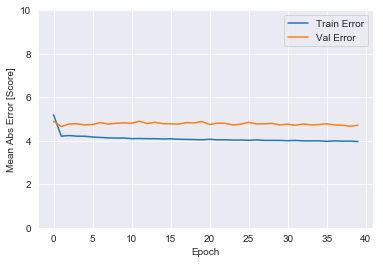

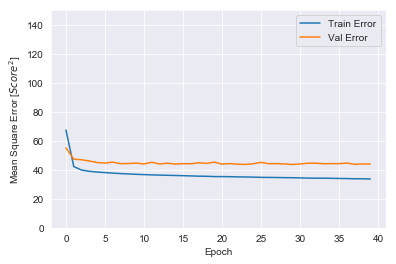

In [82]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_RB, RB_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [83]:
X_test = RBs[RB_train.columns]

In [84]:
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
RBs['DNN'] = new_predictions

In [85]:
X_train = RBtrain.drop('Score', axis=1).astype('float64')
y_train = RBtrain.Score

In [86]:
X_test = RBs[X_train.columns]

In [87]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [88]:
RBNe = neigh.predict(X_test)
RBs['NeProjections'] = RBNe

In [89]:
RBScores = pd.read_csv('Scores/RBScores.csv')
RB = pd.DataFrame({'Name': [], 'Score': []})
RB['Name'] = RBScores['Name']
RB['Score'] = RBScores['FantasyPointsDraftKings']
RB = RB.set_index('Name')
RBs = RBs.join(RB)
RBs = RBs.dropna()
RBs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
David Johnson,6200.0,15.09,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,46.9,79.7,35.2,10.2,42.2,45.4,34.4,16.172728,12.260,13.7
Chase Edmonds,3800.0,4.57,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,12.1,20.6,29.4,11.2,39.4,40.6,33.1,4.992628,6.700,3.1
TJ Logan,3000.0,0.89,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,2.6,4.3,9.5,33.3,42.9,42.9,51.9,2.012607,5.620,0.0
Derrick Coleman,3000.0,0.26,25.26,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,4.6,7.9,3.1,4.6,6.2,7.7,6.2,3.062513,0.020,0.0
Tevin Coleman,4800.0,13.43,21.31,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,37.5,56.1,28.4,8.0,34.3,36.4,34.7,11.201078,8.800,5.1
Brian Hill,3000.0,2.73,21.31,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,2.9,3.0,20.0,0.0,20.0,20.0,6.0,1.867970,4.660,13.5
Ricky Ortiz,3000.0,0.18,21.31,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,10.3,11.0,0.0,2.9,1.9,2.9,2.6,0.908710,-0.040,1.4
Gus Edwards,5000.0,10.38,27.20,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,25.3,35.1,48.7,0.4,49.1,49.1,35.0,8.157371,5.180,11.5
Kenneth Dixon,4400.0,7.93,27.20,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,25.5,33.0,39.2,2.9,42.2,42.2,36.0,8.526347,9.720,5.8


In [90]:
y_test = RBs.Score
y_pred = RBs.DNN
mean_squared_error(y_test, y_pred)

37.021646815275204

In [91]:
y_test = RBs.Score
y_pred = RBs.NeProjections
mean_squared_error(y_test, y_pred)

44.17745813333334

In [92]:
WRtrain = pd.read_csv('TrainingBig/WRtrain.csv')

In [93]:
WRtrain = WRtrain.drop('Unnamed: 0', axis=1)
WRtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,...,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000,6601.000000
mean,4.847235,2.953577,53.327086,37.829632,0.244868,6.787574,10.598922,0.140064,0.781892,0.817316,...,55.747402,6.247372,14.972307,114.321069,63.330662,239.201480,6.808665,10.744630,1.591193,88.564308
std,3.185265,2.095207,20.600791,28.319435,0.278585,3.310214,5.236860,0.352610,2.394510,2.496857,...,8.767282,1.328801,2.276489,141.156567,3.477609,24.018046,0.604331,0.749195,0.365750,9.283538
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,-2.000000,0.000000,-7.000000,-7.000000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,2.250000,1.200000,43.353846,13.818182,0.000000,4.845455,7.575000,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.187500,60.600000,225.187500,6.400000,10.200000,1.312500,82.000000
50%,4.571429,2.666667,56.845455,33.875000,0.181818,7.000000,10.920000,0.000000,0.000000,0.000000,...,55.300000,6.200000,14.600000,35.812500,63.400000,237.900469,6.800000,10.700000,1.562500,89.000000
75%,7.000000,4.400000,66.700000,56.250000,0.375000,8.783333,13.636364,0.125000,0.250000,0.250000,...,60.000000,7.100000,16.600000,40.937500,65.200000,252.375000,7.200000,11.200000,1.875000,95.000000
max,19.000000,16.000000,100.000000,180.000000,2.000000,31.300000,50.000000,4.000000,31.000000,34.000000,...,88.900000,10.100000,22.300000,535.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [94]:
WR = pd.read_csv('Input/Aggregate/WRAggregate.csv')
WRavg = pd.DataFrame()
WRavg['Name'] = WR['Name']
WRavg['Rank'] = WR['Rank']
WRavg['Team'] = WR['Team']
WRavg['TargetsGame'] = WR['ReceivingTargets'] / WR['Played']
WRavg['RecGame'] = WR['Receptions'] / WR['Played']
WRavg['RecPercentage'] = WR['ReceptionPercentage']
WRavg['RecYardsGame'] = WR['ReceivingYards'] / WR['Played']
WRavg['RecTdGame'] = WR['ReceivingTouchdowns'] / WR['Played']
WRavg['YardsTarget'] = WR['ReceivingYardsPerTarget']
WRavg['RecYardsRec'] = WR['ReceivingYardsPerReception']
WRavg['RushesGame'] = WR['RushingAttempts'] / WR['Played']
WRavg['RushYardsGame'] = WR['RushingYards'] / WR['Played']
WRavg['YardAttempt'] = WR['RushingYardsPerAttempt']
WRavg['RushTdGame'] = WR['RushingTouchdowns']
WRavg['PointsGame'] = WR['FantasyPointsPerGameDraftKings']
WRavg = WRavg.set_index('Name')
WRavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Davante Adams,1,GB,10.785714,7.142857,66.2,93.928571,0.857143,8.7,13.2,0.000000,0.000000,0.0,0,22.9
Adam Thielen,2,MIN,10.357143,7.500000,72.4,89.642857,0.642857,8.7,12.0,0.214286,2.000000,9.3,0,22.5
Julio Jones,3,ATL,10.857143,7.142857,65.8,107.928571,0.428571,9.9,15.1,0.142857,0.857143,6.0,0,22.4
Tyreek Hill,4,KC,8.642857,5.571429,64.5,93.142857,0.785714,10.8,16.7,1.357143,8.500000,6.3,0,22.0
DeAndre Hopkins,5,HOU,9.642857,6.714286,69.6,94.357143,0.785714,9.8,14.1,0.071429,-0.500000,-7.0,0,21.7


In [95]:
WRRZ = pd.read_csv('Input/RZ/WRRZ.csv')
WRRZavg = pd.DataFrame()
WRRZavg['Name'] = WRRZ['Name']
WRRZavg['RZTargetsGame'] = WRRZ['ReceivingTargets'] / WRRZ['Played']
WRRZavg['RZRecGame'] = WRRZ['Receptions'] / WRRZ['Played']
WRRZavg['RZRecPercentage'] = WRRZ['ReceptionPercentage']
WRRZavg['RZRecYardsGame'] = WRRZ['ReceivingYards'] / WRRZ['Played']
WRRZavg['RZRecTdGame'] = WRRZ['ReceivingTouchdowns'] / WRRZ['Played']
WRRZavg['RZYardsTarget'] = WRRZ['ReceivingYardsPerTarget']
WRRZavg['RZRecYardsRec'] = WRRZ['ReceivingYardsPerReception']
WRRZavg['RZRushesGame'] = WRRZ['RushingAttempts'] / WRRZ['Played']
WRRZavg['RZRushYardsGame'] = WRRZ['RushingYards'] / WRRZ['Played']
WRRZavg['RZYardAttempt'] = WRRZ['RushingYardsPerAttempt']
WRRZavg['RZRushTdGame'] = WRRZ['RushingTouchdowns'] / WRRZ['Played']
WRRZavg['RZPointsGame'] = WRRZ['FantasyPointsPerGameDraftKings']
WRRZ = WRRZavg.set_index('Name')
WRRZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Davante Adams,2.000000,1.071429,53.6,9.500000,0.785714,4.8,8.9,0.0,0.0,0.0,0.0,6.9
DeAndre Hopkins,1.642857,0.928571,56.5,8.500000,0.571429,5.2,9.2,0.0,0.0,0.0,0.0,5.2
Michael Thomas,1.714286,1.357143,79.2,9.214286,0.428571,5.4,6.8,0.0,0.0,0.0,0.0,4.8
Adam Thielen,1.357143,1.000000,73.7,6.000000,0.428571,4.4,6.0,0.0,0.0,0.0,0.0,4.2
Keenan Allen,1.071429,0.785714,73.3,7.285714,0.428571,6.8,9.3,0.0,0.0,0.0,0.0,4.2


In [96]:
WRsnaps = pd.read_csv('Input/Aggregate/WRSnaps.csv')
WRsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Tim White,BAL,WR,3,2,0.7,0.8,0.0,50.0,50.0,50.0,2.40,120.0
1,2,Darren Waller,OAK,WR,2,13,6.5,10.3,7.7,7.7,15.4,15.4,7.50,57.7
2,3,Leonte Carroo,MIA,WR,7,40,5.7,10.0,2.5,7.5,7.5,10.0,18.80,47.0
3,4,Albert Wilson,MIA,WR,7,231,33.0,48.2,3.5,15.2,15.2,19.0,99.78,43.2
4,5,Cordarrelle Patterson,NE,WR,14,214,15.3,21.9,17.8,12.1,27.1,29.9,89.60,41.9


In [97]:
WRsnaps = WRsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
WRsnaps = WRsnaps.set_index('Name')

In [98]:
WRDef = pd.DataFrame()
WRDef['Team'] = Defense['Team']
WRDef['DPointsAllowed'] = Defense['DraftKingsWideReceiverFantasyPointsAllowedAverage']
WRDef = WRDef.set_index('Team')
WRDef.head()

,DPointsAllowed
Team,
BAL,29.64
MIN,28.65
BUF,30.11
JAX,28.23
TEN,39.45


In [99]:
WRSalaries = pd.read_csv('Input/Salaries/WRSalaries.csv').dropna()
WRSalaries = WRSalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
WRSalaries = WRSalaries.set_index('Opponent')
WRSalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
NYJ,Davante Adams,GB,8500.0,20.43
PHI,DeAndre Hopkins,HOU,8600.0,20.16
NO,Antonio Brown,PIT,8300.0,19.25
PIT,Michael Thomas,NO,8100.0,19.14
CAR,Julio Jones,ATL,8700.0,18.69


In [100]:
WRSalaries = WRSalaries.join(WRDef).join(QBDefense)
WRSalaries = WRSalaries.set_index('Team').join(Vegas).join(WROffense)
WRSalaries.head()


,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Larry Fitzgerald,5200.0,12.68,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Trent Sherfield,3400.0,7.05,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Chad Williams,3000.0,3.94,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Jalen Tolliver,3000.0,3.09,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,JJ Nelson,3200.0,2.64,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64


In [101]:
WRSalaries = WRSalaries.set_index('Name')
WRSalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5200.0,12.68,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Trent Sherfield,3400.0,7.05,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Chad Williams,3000.0,3.94,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Jalen Tolliver,3000.0,3.09,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
JJ Nelson,3200.0,2.64,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.7125,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64


In [102]:
WRs = WRSalaries.join(WRavg).join(WRRZ).join(WRsnaps).dropna()
WRs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5200.0,12.68,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,2.8,53.9,91.6,0.0,12.5,7.8,12.5,21.0
Trent Sherfield,3400.0,7.05,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.7,22.5,34.3,0.0,7.3,4.5,7.3,11.9
Chad Williams,3000.0,3.94,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.2,43.8,42.5,0.0,8.9,3.1,8.9,8.1
Jalen Tolliver,3000.0,3.09,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.0,27.5,39.6,0.0,5.5,3.6,5.5,7.6
JJ Nelson,3200.0,2.64,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.0,15.2,25.8,1.9,8.9,5.2,10.8,6.3


In [103]:
WRtrain = WRtrain.set_index('Name')

In [104]:
WR_train = WRtrain.drop('Home', axis=1)

train_dataset = WR_train.sample(frac=0.8,random_state=0)
test_dataset = WR_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,5281.0,4.858261,3.206333,0.000000,2.250000,4.571429,7.000000,19.000000
RecGame,5281.0,2.960114,2.106555,0.000000,1.200000,2.666667,4.400000,16.000000
RecPercentage,5281.0,53.283772,20.612715,0.000000,43.450000,56.808333,66.700000,100.000000
RecYardsGame,5281.0,37.817734,28.340631,-2.000000,13.800000,33.800000,56.142857,180.000000
RecTdGame,5281.0,0.244350,0.278619,0.000000,0.000000,0.181818,0.375000,2.000000
YardsTarget,5281.0,6.766731,3.300392,-2.000000,4.833333,6.980000,8.780000,31.300000
RecYardsRec,5281.0,10.552208,5.191810,-2.000000,7.542857,10.900000,13.600000,50.000000
RushesGame,5281.0,0.139356,0.347364,0.000000,0.000000,0.000000,0.142857,4.000000
RushYardsGame,5281.0,0.782817,2.355947,-7.000000,0.000000,0.000000,0.285714,31.000000
YardAttempt,5281.0,0.833905,2.566437,-7.000000,0.000000,0.000000,0.285714,34.000000


In [105]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



.................

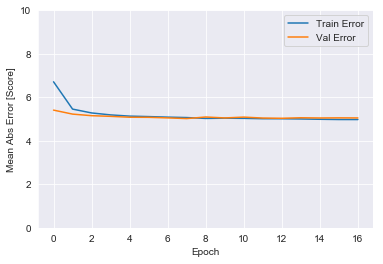

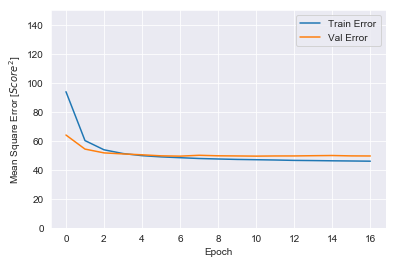

In [106]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [107]:
columns = WR_train.drop('Score', axis=1)
X_test = WRs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
WRs['DNN'] = new_predictions

In [108]:
X_train = WRtrain.drop('Score', axis=1).astype('float64')
y_train = WRtrain.Score
X_test = WRs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
WRNe = neigh.predict(X_test)
WRs['NeProjections'] = WRNe

In [109]:
WRScores = pd.read_csv('Scores/WRScores.csv')
WR = pd.DataFrame({'Name': [], 'Score': []})
WR['Name'] = WRScores['Name']
WR['Score'] = WRScores['FantasyPointsDraftKings']
WR = WR.set_index('Name')
WRs = WRs.join(WR)
WRs = WRs.dropna()
WRs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Larry Fitzgerald,5200.0,12.68,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,53.9,91.6,0.0,12.5,7.8,12.5,21.0,10.060001,11.38,16.58
Trent Sherfield,3400.0,7.05,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,22.5,34.3,0.0,7.3,4.5,7.3,11.9,4.943923,15.42,12.20
Chad Williams,3000.0,3.94,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,43.8,42.5,0.0,8.9,3.1,8.9,8.1,5.356713,9.70,1.70
Jalen Tolliver,3000.0,3.09,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,27.5,39.6,0.0,5.5,3.6,5.5,7.6,5.699443,2.58,2.50
Pharoh Cooper,3000.0,0.17,37.38,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,1.2,1.7,0.0,16.7,0.0,16.7,0.0,0.787394,4.56,0.00
Julio Jones,8700.0,18.69,39.46,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,53.1,79.5,0.3,20.5,13.7,20.7,42.2,15.330215,10.74,12.80
Calvin Ridley,5100.0,11.75,39.46,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,40.7,61.0,1.1,14.4,10.9,15.4,31.3,8.723775,5.10,18.00
Mohamed Sanu,4400.0,10.58,39.46,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,52.6,78.7,0.5,10.3,8.0,11.0,19.6,9.598329,4.66,22.00
Justin Hardy,3000.0,2.75,39.46,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,13.9,20.9,0.0,10.3,7.2,10.3,20.2,1.382947,7.50,0.00


In [110]:
y_test = WRs.Score
y_pred = WRs.DNN
mean_squared_error(y_test, y_pred)

45.06748082086936

In [111]:
y_test = WRs.Score
y_pred = WRs.NeProjections
mean_squared_error(y_test, y_pred)

50.03293766233765

In [112]:
TEtrain = pd.read_csv('TrainingBig/TEtrain.csv')

In [113]:
TEtrain = TEtrain.drop('Unnamed: 0', axis=1)
TEtrain.describe()

,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,...,OpponentRedZonePercentage,OpponentTimesSackedPercentage,QuarterbackHitsPercentage,OpponentPassingAttempts,OpponentCompletionPercentage,OpponentPassingYards,OpponentPassingYardsPerAttempt,OpponentPassingYardsPerCompletion,OpponentPassingTouchdowns,OpponentPasserRating
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,...,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,3.271695,2.165516,55.366585,24.335687,0.195245,6.146591,8.545867,0.009539,0.031148,0.055524,...,55.862570,6.262135,14.963066,118.957189,63.366108,239.540621,6.818250,10.753414,1.597948,88.667908
std,2.441962,1.693805,21.967002,20.820687,0.243670,3.286346,4.540343,0.048061,0.239737,0.546318,...,8.965907,1.346978,2.283251,144.508700,3.520194,24.390979,0.613156,0.754393,0.372174,9.411604
min,0.000000,0.000000,0.000000,-0.600000,0.000000,-0.600000,-0.600000,0.000000,-0.800000,-2.700000,...,34.800000,2.800000,9.800000,30.687500,55.400000,169.875000,5.300000,9.200000,0.812500,66.000000
25%,1.200000,0.800000,42.420455,7.800000,0.000000,4.166667,5.384615,0.000000,0.000000,0.000000,...,50.000000,5.400000,13.300000,34.250000,60.600000,225.187500,6.400000,10.200000,1.312500,82.000000
50%,2.577381,1.696154,59.716667,18.500000,0.125000,6.092308,8.678889,0.000000,0.000000,0.000000,...,55.600000,6.300000,14.700000,36.125000,63.400000,237.875000,6.800000,10.700000,1.562500,89.000000
75%,5.000000,3.333333,70.516346,36.627273,0.300000,8.088333,11.266667,0.000000,0.000000,0.000000,...,60.500000,7.100000,16.600000,262.000000,65.200000,254.062500,7.200000,11.200000,1.875000,95.000000
max,14.000000,9.000000,100.000000,114.500000,3.000000,33.750000,41.000000,1.000000,5.500000,10.000000,...,88.900000,10.100000,22.300000,535.000000,74.700000,313.333333,8.900000,13.600000,2.812500,123.000000


In [114]:
TEtrain = TEtrain.set_index('Name')

In [115]:
TE_train = TEtrain.drop('Home', axis=1)

train_dataset = TE_train.sample(frac=0.8,random_state=0)
test_dataset = TE_train.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("Score")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TargetsGame,2578.0,3.264277,2.438576,0.000000,1.200000,2.600000,5.000000,13.500000
RecGame,2578.0,2.161725,1.693210,0.000000,0.800000,1.692308,3.333333,9.000000
RecPercentage,2578.0,55.279377,21.989751,0.000000,41.896250,59.803571,70.444034,100.000000
RecYardsGame,2578.0,24.210358,20.687130,-0.600000,7.700000,18.621429,36.500000,114.500000
RecTdGame,2578.0,0.194048,0.241434,0.000000,0.000000,0.133929,0.300000,3.000000
YardsTarget,2578.0,6.103997,3.231416,-0.600000,4.126250,6.100000,8.006250,32.000000
RecYardsRec,2578.0,8.480795,4.490102,-0.600000,5.300000,8.678889,11.200000,35.000000
RushesGame,2578.0,0.009799,0.049557,0.000000,0.000000,0.000000,0.000000,1.000000
RushYardsGame,2578.0,0.031300,0.250640,-0.800000,0.000000,0.000000,0.000000,5.500000
YardAttempt,2578.0,0.054267,0.536000,-2.700000,0.000000,0.000000,0.000000,10.000000


In [116]:
train_labels = train_dataset.pop('Score')
test_labels = test_dataset.pop('Score')
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                2720      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________



.........................

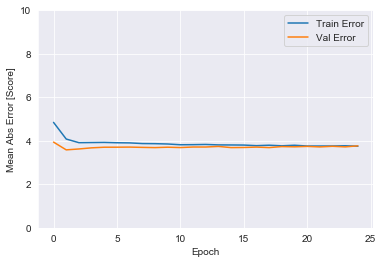

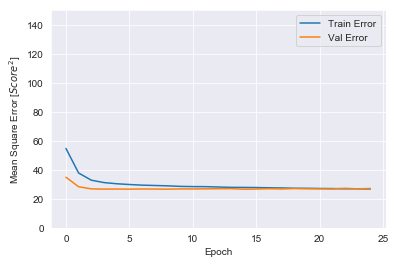

In [117]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [118]:
TE = pd.read_csv('Input/Aggregate/TEAggregate.csv')
TEavg = pd.DataFrame()
TEavg['Name'] = TE['Name']
TEavg['Rank'] = TE['Rank']
TEavg['Team'] = TE['Team']
TEavg['TargetsGame'] = TE['ReceivingTargets'] / TE['Played']
TEavg['RecGame'] = TE['Receptions'] / TE['Played']
TEavg['RecPercentage'] = TE['ReceptionPercentage']
TEavg['RecYardsGame'] = TE['ReceivingYards'] / TE['Played']
TEavg['RecTdGame'] = TE['ReceivingTouchdowns'] / TE['Played']
TEavg['YardsTarget'] = TE['ReceivingYardsPerTarget']
TEavg['RecYardsRec'] = TE['ReceivingYardsPerReception']
TEavg['RushesGame'] = TE['RushingAttempts'] / TE['Played']
TEavg['RushYardsGame'] = TE['RushingYards'] / TE['Played']
TEavg['YardAttempt'] = TE['RushingYardsPerAttempt']
TEavg['RushTdGame'] = TE['RushingTouchdowns']
TEavg['PointsGame'] = TE['FantasyPointsPerGameDraftKings']
TEavg = TEavg.set_index('Name')
TEavg.head()

,Rank,Team,TargetsGame,RecGame,RecPercentage,RecYardsGame,RecTdGame,YardsTarget,RecYardsRec,RushesGame,RushYardsGame,YardAttempt,RushTdGame,PointsGame
Name,,,,,,,,,,,,,,
Travis Kelce,1,KC,9.428571,6.642857,70.5,87.142857,0.714286,9.2,13.1,0.000000,0.000000,0.0,0,20.6
Zach Ertz,2,PHI,9.714286,7.214286,74.3,74.142857,0.428571,7.6,10.3,0.000000,0.000000,0.0,0,18.1
George Kittle,3,SF,7.857143,5.142857,65.5,82.428571,0.285714,10.5,16.0,0.071429,0.714286,10.0,0,16.0
Eric Ebron,4,IND,7.071429,4.214286,59.6,47.285714,0.857143,6.7,11.2,0.214286,-0.571429,-2.7,1,14.6
Jared Cook,5,OAK,6.642857,4.500000,67.7,60.571429,0.428571,9.1,13.5,0.000000,0.000000,0.0,0,14.0


In [119]:
TERZ = pd.read_csv('Input/RZ/TERZ.csv')
TERZavg = pd.DataFrame()
TERZavg['Name'] = TERZ['Name']
TERZavg['RZTargetsGame'] = TERZ['ReceivingTargets'] / TERZ['Played']
TERZavg['RZRecGame'] = TERZ['Receptions'] / TERZ['Played']
TERZavg['RZRecPercentage'] = TERZ['ReceptionPercentage']
TERZavg['RZRecYardsGame'] = TERZ['ReceivingYards'] / TERZ['Played']
TERZavg['RZRecTdGame'] = TERZ['ReceivingTouchdowns'] / TERZ['Played']
TERZavg['RZYardsTarget'] = TERZ['ReceivingYardsPerTarget']
TERZavg['RZRecYardsRec'] = TERZ['ReceivingYardsPerReception']
TERZavg['RZRushesGame'] = TERZ['RushingAttempts'] / TERZ['Played']
TERZavg['RZRushYardsGame'] = TERZ['RushingYards'] / TERZ['Played']
TERZavg['RZYardAttempt'] = TERZ['RushingYardsPerAttempt']
TERZavg['RZRushTdGame'] = TERZ['RushingTouchdowns'] / TERZ['Played']
TERZavg['RZPointsGame'] = TERZ['FantasyPointsPerGameDraftKings']
TERZ = TERZavg.set_index('Name')
TERZ.head()

,RZTargetsGame,RZRecGame,RZRecPercentage,RZRecYardsGame,RZRecTdGame,RZYardsTarget,RZRecYardsRec,RZRushesGame,RZRushYardsGame,RZYardAttempt,RZRushTdGame,RZPointsGame
Name,,,,,,,,,,,,
Eric Ebron,1.428571,0.785714,55.0,9.000000,0.714286,6.3,11.5,0.142857,0.071429,0.5,0.071429,6.4
Travis Kelce,1.642857,1.071429,65.2,8.357143,0.642857,5.1,7.8,0.000000,0.000000,0.0,0.000000,5.8
Zach Ertz,1.642857,0.857143,52.2,7.000000,0.428571,4.3,8.2,0.000000,0.000000,0.0,0.000000,4.1
Cameron Brate,0.785714,0.571429,72.7,5.142857,0.428571,6.5,9.0,0.000000,0.000000,0.0,0.000000,3.7
Trey Burton,0.857143,0.642857,75.0,3.928571,0.357143,4.6,6.1,0.071429,0.142857,2.0,0.000000,3.3


In [120]:
TEsnaps = pd.read_csv('Input/Aggregate/TESnaps.csv')
TEsnaps.head()

,Rank,Name,Team,Position,Played,SnapsPlayed,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointsDraftKings,FantasyPointSnapPercentageDraftKings
0,1,Erik Swoope,NO,TE,7,78,11.1,9.3,0.0,12.8,10.3,12.8,34.7,44.5
1,2,Jordan Franks,CIN,TE,3,11,3.7,5.9,0.0,27.3,18.2,27.3,5.7,51.8
2,3,Robert Tonyan Jr.,GB,TE,14,38,2.7,4.1,0.0,7.9,5.3,7.9,13.9,36.6
3,4,Eric Ebron,IND,TE,14,575,41.1,58.1,0.5,17.2,11.0,17.9,204.4,35.5
4,5,Anthony Firkser,TEN,TE,8,109,13.6,22.5,0.0,14.7,14.7,14.7,42.1,38.6


In [121]:
TEsnaps = TEsnaps.drop(['Team', 'FantasyPointsDraftKings', 'SnapsPlayed', 'Played', 'Position', 'Rank'], axis=1)
TEsnaps = TEsnaps.set_index('Name')

In [122]:
TEDef = pd.DataFrame()
TEDef['Team'] = Defense['Team']
TEDef['DPointsAllowed'] = Defense['DraftKingsTightEndFantasyPointsAllowedAverage']
TEDef = TEDef.set_index('Team')
TEDef.head()

,DPointsAllowed
Team,
BAL,13.59
MIN,10.24
BUF,8.36
JAX,13.27
TEN,8.23


In [123]:
TESalaries = pd.read_csv('Input/Salaries/TESalaries.csv').dropna()
TESalaries = TESalaries.drop(['Rank', 'Position', 'Week', 'UpcomingOpponentRank', \
'UpcomingOpponentPositionRank'], axis=1)
TESalaries = TESalaries.set_index('Opponent')
TESalaries.head()

,Name,Team,DraftKingsSalary,FantasyPointsDraftKings
Opponent,,,,
SEA,Travis Kelce,KC,7200.0,18.03
HOU,Zach Ertz,PHI,5900.0,15.80
CHI,George Kittle,SF,6000.0,14.06
NYG,Eric Ebron,IND,5700.0,13.30
DEN,Jared Cook,OAK,5300.0,12.28


In [124]:
TESalaries = TESalaries.join(TEDef).join(QBDefense)
TESalaries = TESalaries.set_index('Team').join(Vegas).join(WROffense)
TESalaries.head()

,Name,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Team,,,,,,,,,,,,,,,,,,,,,
ARI,Ricky Seals-Jones,2900.0,5.97,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Jermaine Gresham,2500.0,2.28,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,John Phillips,2500.0,0.30,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ARI,Darrell Daniels,2500.0,0.02,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
ATL,Austin Hooper,3700.0,9.61,15.61,24.6,60.713372,352.552326,5.8,20.166279,11.656395,...,45.6,3.139326,63.6,38.956180,69.8,288.247191,7.4,10.6,2.140449,105


In [125]:
TESalaries = TESalaries.set_index('Name')
TESalaries.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,ThirdDownPercentage,RedZoneAttempts,RedZonePercentage,PassingAttempts,CompletionPercentage,PassingYards,TeamPassingYardsPerAttempt,PassingYardsPerCompletion,PassingTouchdowns,PasserRating
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.97,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Jermaine Gresham,2500.0,2.28,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
John Phillips,2500.0,0.30,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Darrell Daniels,2500.0,0.02,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.4,1.712500,70.8,30.682292,57.4,160.618229,5.2,9.1,0.927604,64
Austin Hooper,3700.0,9.61,15.61,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,45.6,3.139326,63.6,38.956180,69.8,288.247191,7.4,10.6,2.140449,105


In [126]:
TEs = TESalaries.join(TEavg).join(TERZ).join(TEsnaps).dropna()
TEs.head()

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,RZYardAttempt,RZRushTdGame,RZPointsGame,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.97,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.0,38.1,64.7,0.0,12.9,6.2,12.9,13.7
Jermaine Gresham,2500.0,2.28,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.2,30.8,51.0,0.0,3.2,2.4,3.2,4.7
John Phillips,2500.0,0.30,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.0,10.3,16.5,0.0,0.0,0.0,0.0,0.0
Darrell Daniels,2500.0,0.02,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,0.0,0.0,0.0,7.0,8.1,0.0,1.4,0.0,1.4,0.0
Austin Hooper,3700.0,9.61,15.61,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,0.0,0.0,2.8,52.1,78.0,0.0,11.0,8.8,11.0,20.0


In [127]:
columns = TE_train.drop('Score', axis=1)
X_test = TEs[columns.columns]
normed_x_test = norm(X_test)
new_predictions = model.predict(normed_x_test).flatten()
TEs['DNN'] = new_predictions

In [128]:
X_train = TEtrain.drop('Score', axis=1).astype('float64')
y_train = TEtrain.Score
X_test = TEs[X_train.columns]
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
TENe = neigh.predict(X_test)
TEs['NeProjections'] = TENe

In [129]:
TEScores = pd.read_csv('Scores/TEScores.csv')
TE = pd.DataFrame({'Name': [], 'Score': []})
TE['Name'] = TEScores['Name']
TE['Score'] = TEScores['FantasyPointsDraftKings']
TE = TE.set_index('Name')
TEs = TEs.join(TE)
TEs = TEs.dropna()
TEs

,DraftKingsSalary,FantasyPointsDraftKings,DPointsAllowed,OpponentPointsPerGame,OpponentOffensivePlays,OpponentOffensiveYards,OpponentOffensiveYardsPerPlay,OpponentFirstDowns,OpponentThirdDownAttempts,OpponentThirdDownPercentage,...,SnapsPerGame,SnapsPlayedPercentage,RushSnapPercentage,TargetSnapPercentage,TouchSnapPercentage,IntendedTouchSnapPercentage,FantasyPointSnapPercentageDraftKings,DNN,NeProjections,Score
Name,,,,,,,,,,,,,,,,,,,,,
Ricky Seals-Jones,2900.0,5.97,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,38.1,64.7,0.0,12.9,6.2,12.9,13.7,4.542280,2.18,1.3
Jermaine Gresham,2500.0,2.28,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,30.8,51.0,0.0,3.2,2.4,3.2,4.7,2.590726,2.60,0.0
John Phillips,2500.0,0.30,13.49,24.5,60.642857,363.071429,6.0,20.357143,11.857143,39.2,...,10.3,16.5,0.0,0.0,0.0,0.0,0.0,0.837932,1.98,1.9
Austin Hooper,3700.0,9.61,15.61,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,52.1,78.0,0.0,11.0,8.8,11.0,20.0,8.712298,5.18,5.6
Eric Saubert,2500.0,1.66,15.61,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,10.9,16.3,0.0,5.9,3.3,5.9,6.4,2.063324,2.40,0.0
Logan Paulsen,2500.0,1.23,15.61,24.6,60.713372,352.552326,5.8,20.166279,11.656395,39.9,...,23.7,32.9,0.0,2.6,2.6,2.6,6.9,-0.259124,1.64,0.0
Mark Andrews,3200.0,4.29,10.75,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,26.2,34.9,0.0,11.7,7.6,11.7,22.2,1.946061,8.90,16.3
Hayden Hurst,2500.0,2.64,10.75,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,23.7,32.2,0.4,7.2,4.6,7.6,11.1,1.226269,3.88,2.8
Nick Boyle,2500.0,2.31,10.75,21.3,60.540604,329.363758,5.4,19.798993,12.436913,40.8,...,41.1,54.8,0.0,6.1,3.6,6.1,7.1,2.361937,7.00,3.5


In [130]:
y_test = TEs.Score
y_pred = TEs.DNN
mean_squared_error(y_test, y_pred)

40.97877267307606

In [131]:
y_test = TEs.Score
y_pred = TEs.NeProjections
mean_squared_error(y_test, y_pred)

40.605823809523805